### auc roc example

二分类模型对正负样例的区分程度，可以用auc和roc来度量。
下文演示不同的数据分布下（模拟模型预测结果），auc的取值和roc曲线。

实现原理可参考: 文档(docs/metrics) 和 源代码(sgd_rec_sys/metrics/auc_roc.py)方便理解

In [154]:
# 配置运行环境
%cd /playground/sgd_deep_learning/sgd_rec_sys/
import sys 
sys.path.append('./python')

/playground/sgd_deep_learning/sgd_rec_sys


In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sgd_rec_sys.metrics import auc, roc

### numpy正态分布数据采样
简介下文用到的数据采样方式

In [156]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [157]:
abs(mu - np.mean(s))

0.0003004052656052123

In [158]:
abs(sigma - np.std(s, ddof=1))

0.00021942886792906957

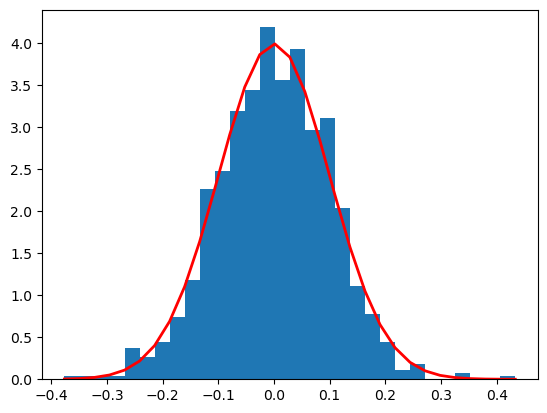

In [159]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

plt.show()                


count, bins, ignored = plt.hist(s, 30, density=True)

## case1：完全可分数据集

In [160]:
# 模拟模型对正负样本的预测概率（假设是正态分布），输出 y_hat, y
def sample_fake_data(pos_n, neg_n, pos_mu, pos_sigma, neg_mu, neg_sigma,):
    neg_samples = np.random.normal(pos_mu, pos_sigma, pos_n)
    pos_samples = np.random.normal(neg_mu, neg_sigma, neg_n,)
    # print(neg_samples.shape)
    # print(pos_samples.shape)
    y_hat = np.concatenate([neg_samples, pos_samples], axis=0)
    # print(y_hat.shape)
    
    # 修正y_hat到[0,1]之间
    y_hat[y_hat <0] = 0
    y_hat[y_hat >1] = 1
    
    y = np.zeros(neg_n+ pos_n, dtype=int)
    y[neg_n:] = 1
    
    return y_hat, y


(2000,)


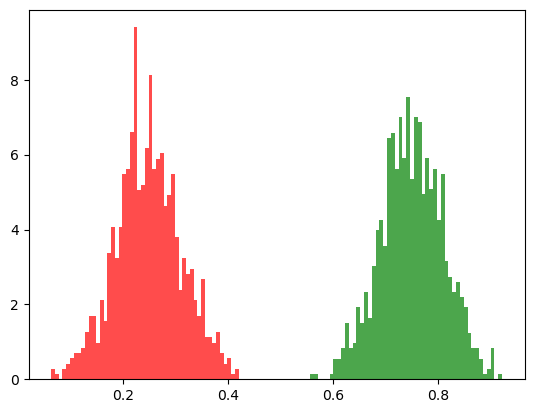

In [161]:
# 模拟模型预测分布
pos_n, pos_mu, pos_sigma = 1000, 0.25, 0.25/4
neg_n, neg_mu, neg_sigma =1000, 0.75, 0.25/4
y_hat, y = sample_fake_data(pos_n, neg_n, pos_mu, pos_sigma, neg_mu, neg_sigma)
print(y_hat.shape)

hit_nums = 50

# 画图看看正负样例分布情况
neg_count, neg_bins, neg_ignored = plt.hist(y_hat[:neg_n], hit_nums, density=True, color='r',alpha=0.7)
# plt.plot(neg_bins, 1/(neg_sigma * np.sqrt(2 * np.pi)) *
#     np.exp( - (neg_bins - neg_mu)**2 / (2 * neg_sigma**2) ),
#          linewidth=2,  color='r',)

pos_count, pos_bins, pos_ignored = plt.hist(y_hat[neg_n:], hit_nums, density=True, color='g', alpha=0.7)
# plt.plot(pos_bins, 1/(pos_sigma * np.sqrt(2 * np.pi)) *
#     np.exp( - (pos_bins - pos_mu)**2 / (2 * pos_sigma**2) ),
#          linewidth=2,   color='b',)

plt.show() 

In [162]:
# 定义
def draw_roc(points):
    points = np.array(points)
    fig, ax = plt.subplots()
    ax.plot(points[:,0], points[:,1])
    plt.show()

auc: 0.9994999999999999


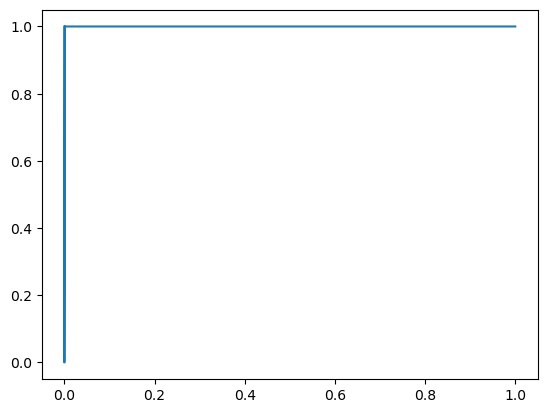

In [163]:
# roc曲线可视化
points = roc(y_hat, y)
print('auc:', auc(y_hat, y))
draw_roc(points)

## case2：部分可分数据集

(2000,)


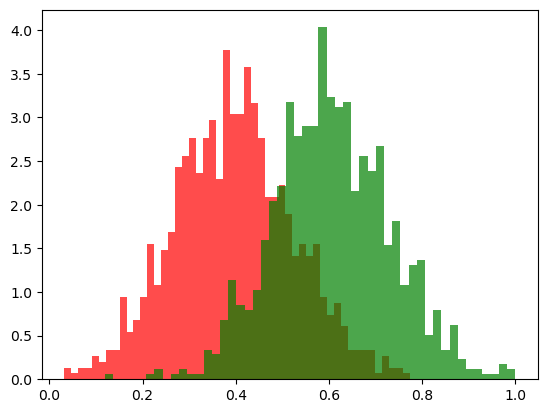

In [164]:
pos_n, pos_mu, pos_sigma = 1000, 0.4, 0.25/2
neg_n, neg_mu, neg_sigma =1000, 0.6, 0.25/2
y_hat, y = sample_fake_data(pos_n, neg_n, pos_mu, pos_sigma, neg_mu, neg_sigma)
print(y_hat.shape)

hit_nums = 50

# 画图看看正负样例分布情况
neg_count, neg_bins, neg_ignored = plt.hist(y_hat[:neg_n], hit_nums, density=True, color='r',alpha=0.7)
pos_count, pos_bins, pos_ignored = plt.hist(y_hat[neg_n:], hit_nums, density=True, color='g', alpha=0.7)

plt.show() 

auc: 0.8820775000000001


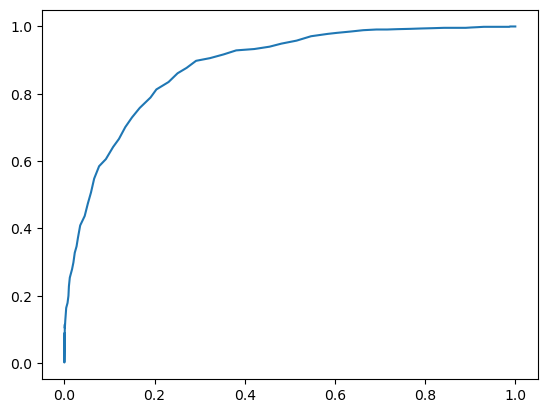

In [165]:
# roc曲线可视化
points = roc(y_hat, y)
print('auc:', auc(y_hat, y))
draw_roc(points)

## case3：完全不可分数据集

(2000,)


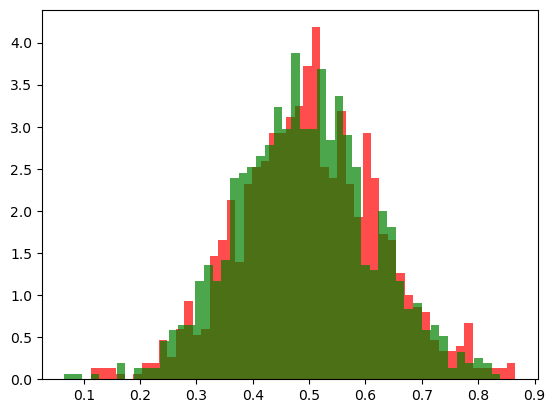

In [166]:
pos_n, pos_mu, pos_sigma = 1000, 0.5, 0.5/4
neg_n, neg_mu, neg_sigma =1000, 0.5, 0.5/4
y_hat, y = sample_fake_data(pos_n, neg_n, pos_mu, pos_sigma, neg_mu, neg_sigma)
print(y_hat.shape)

hit_nums = 50

# 画图看看正负样例分布情况
neg_count, neg_bins, neg_ignored = plt.hist(y_hat[:neg_n], hit_nums, density=True, color='r',alpha=0.7)
pos_count, pos_bins, pos_ignored = plt.hist(y_hat[neg_n:], hit_nums, density=True, color='g', alpha=0.7)

plt.show() 

auc: 0.47750549999999997


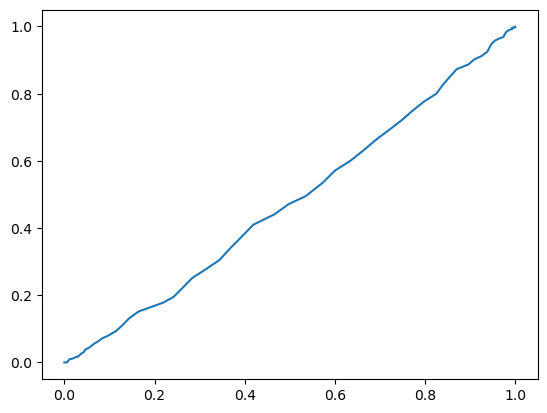

In [167]:
# roc曲线可视化
points = roc(y_hat, y)
print('auc:', auc(y_hat, y))
draw_roc(points)

## case4：反向完全可分数据集

(2000,)


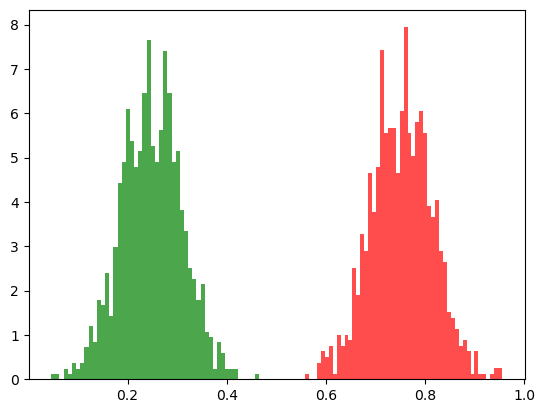

In [168]:
pos_n, pos_mu, pos_sigma = 1000, 0.75, 0.25/4
neg_n, neg_mu, neg_sigma =1000, 0.25, 0.25/4
y_hat, y = sample_fake_data(pos_n, neg_n, pos_mu, pos_sigma, neg_mu, neg_sigma)
print(y_hat.shape)

hit_nums = 50

# 画图看看正负样例分布情况
neg_count, neg_bins, neg_ignored = plt.hist(y_hat[:neg_n], hit_nums, density=True, color='r',alpha=0.7)
pos_count, pos_bins, pos_ignored = plt.hist(y_hat[neg_n:], hit_nums, density=True, color='g', alpha=0.7)

plt.show() 

auc: 0.0005000000000000004


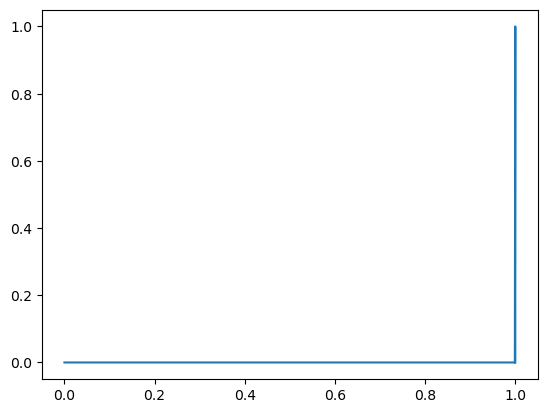

In [169]:
# roc曲线可视化
points = roc(y_hat, y)
print('auc:', auc(y_hat, y))
draw_roc(points)